AutoEncoder 활용 이상탐지 //심장 질병 이상 환자 예측

**목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* Session 1 - 「Data 전처리 및 EDA」
* Session 2 - 「데이터 범주화 및 탐색」
* Session 3 - 「AutoEncoder 활용 이상진단」

In [1]:
# ▶ pd.setoption
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# ▶ Data read
df = pd.read_csv("heart_disease.csv")
df.head(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,1,0,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,0,0,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,1,0,1,0,3,0,0,1,0,11,4,4
8,1,1,1,1,30,1,0,2,0,1,1,0,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,1,0,1,0,2,0,0,0,1,8,4,3


In [2]:
# ▶ Data 형태 확인
# ▶ 253,680 row, 22 col로 구성됨
print('df', df.shape)

df (253680, 22)


In [3]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [4]:
# ▶ Null 값 확인
print(df.isnull().sum())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [5]:
# ▶ Outlier 확인
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
# ▶ 중복 데이터 여부 확인
df.duplicated().value_counts()

False    229781
True      23899
dtype: int64

In [7]:
# ▶ 중복 데이터 제거, default = first
df.drop_duplicates(inplace=True)
df.shape

(229781, 22)

In [8]:
df.duplicated().value_counts()

False    229781
dtype: int64

### · Target 변수 분포 확인
---
* 예측 하고자 하는 Target 변수(target) 분포 확인

In [9]:
# ▶ 보유하고 있는 데이터는 10.3*+%의 Target ratio를 가지고 있음
pd.DataFrame({"count":df['HeartDiseaseorAttack'].value_counts(),"ratio(%)":df['HeartDiseaseorAttack'].value_counts(normalize=True)*100})

,count,ratio(%)
0,206064,89.678433
1,23717,10.321567


### · 데이터 범주화(Categorizing)
---
* 데이터를 성격과 특성에 맞춰 범주화
* 범주화를 하는 이유?
 * 새로운 인사이트 발견
 * 모델링 후 변수 해석력 상승
 * 범주화 기반 가설 수립

In [10]:
# ▶ (1) 개인 프로필
Demo = ['Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']
df[Demo].head()

,Sex,Age,Education,Income,AnyHealthcare,NoDocbcCost
0,0,9,4,3,1,0
1,0,7,6,1,0,1
2,0,9,4,8,1,1
3,0,11,3,6,1,0
4,0,11,5,4,1,0


In [11]:
# ▶ (2) 밀접(기저) 질환 병력 유무
medical_history = ['HighBP', 'Stroke', 'Diabetes', 'HighChol', 'CholCheck']
df[medical_history].head()

,HighBP,Stroke,Diabetes,HighChol,CholCheck
0,1,0,0,1,1
1,0,0,0,0,0
2,1,0,0,1,1
3,1,0,0,0,1
4,1,0,0,1,1


In [12]:
# ▶ (3) 일상 생활/식습관 패턴
life_style = ['BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'DiffWalk', 'GenHlth']
df[life_style].head()

,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,DiffWalk,GenHlth
0,40,1,0,0,1,0,18,15,1,5
1,25,1,1,0,0,0,0,0,0,3
2,28,0,0,1,0,0,30,30,1,5
3,27,0,1,1,1,0,0,0,0,2
4,24,0,1,1,1,0,3,0,0,2


In [13]:
# ▶ (1) 개인 프로필(Demo) > Sex, Age, Education, Income은 타겟 변수와의 관계가 높음
Demo

['Sex', 'Age', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']

[TB]-------------------------
     count   sum  ratio
Age                    
1     5512    29    0.5
2     7068    54    0.8
3    10025   126    1.3
4    12234   193    1.6
5    14050   351    2.5
6    17299   711    4.1
7    23140  1424    6.2
8    27301  2248    8.2
9    29736  3346   11.3
10   29168  4135   14.2
11   22041  3896   17.7
12   15394  3076   20.0
13   16813  4128   24.6
-----------------------------


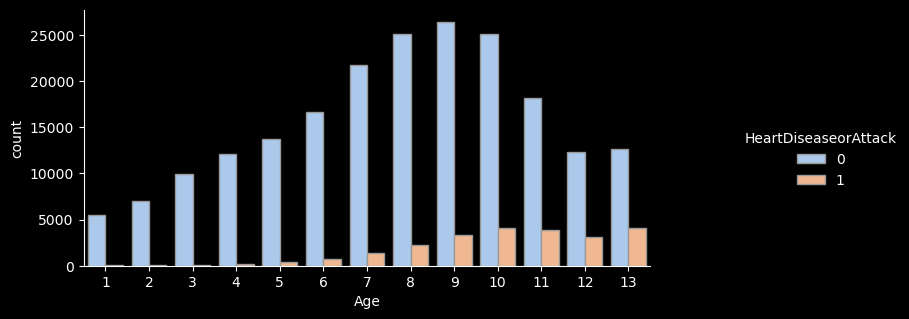

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# ▶ Sex(성별)
val = 'Age'

sns.catplot(x=val, hue="HeartDiseaseorAttack", kind="count", palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby(val)['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print('[TB]-------------------------')
print(df_gp)
print('-----------------------------')

### · ② 밀접 질환 병력 유무
---

In [14]:
# ▶ (2) 밀접 질환 병력 유무 > 모두 밀접한 관련이 있다.
medical_history

['HighBP', 'Stroke', 'Diabetes', 'HighChol', 'CholCheck']

[TB]---------------------------------------
            count    sum  ratio  ratio_2
CholCheck                               
0            9298    271    2.9      4.0
1          220483  23446   10.6     96.0
-------------------------------------------


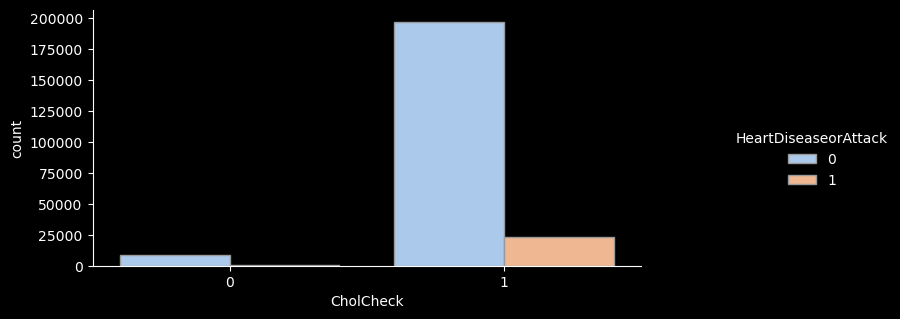

In [15]:
# ▶ Stroke
val = 'CholCheck'

sns.catplot(x=val, hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby(val)['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['ratio_2'] = round((df_gp['count'] / len(df))*100,1)
print('[TB]---------------------------------------')
print(df_gp)
print('-------------------------------------------')

### · ③ 일상 생활/식습관 패턴
---

In [16]:
# ▶ (3) 일상 생활/식습관 패턴
print(life_style)

['BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'DiffWalk', 'GenHlth']


[TB]---------------------------------------
         count   sum  ratio  ratio_2
GenHlth                             
1        34907  1009    2.9     15.2
2        77536  4037    5.2     33.7
3        73714  7841   10.6     32.1
4        31546  6724   21.3     13.7
5        12078  4106   34.0      5.3
-------------------------------------------


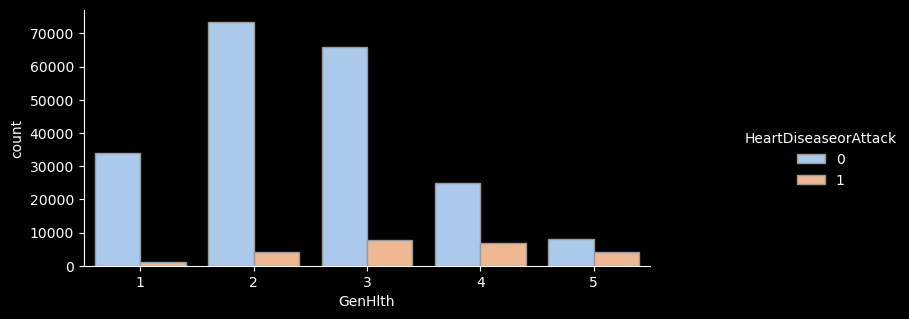

In [17]:
# ▶ DiffWalk
val = 'GenHlth'

sns.catplot(x=val, hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby(val)['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['ratio_2'] = round((df_gp['count'] / len(df))*100,1)
print('[TB]---------------------------------------')
print(df_gp)
print('-------------------------------------------')

**Autoencoder 활용 이상진단**  

### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [18]:
# ▶ Test 데이터는 추후 이상진단 성능을 확인하기 위함 (※ Autoencoder 학습시에는 y data가 필요 없음)
# ▶ f-string, python 3.6 등장 (※ 문자열과 변수를 자유롭게 표현 가능)
from sklearn.model_selection import train_test_split

X = df.drop(columns='HeartDiseaseorAttack')
y = pd.DataFrame(df['HeartDiseaseorAttack'])

print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X shape : (229781, 21)
y shape : (229781, 1)
X_train shape: (183824, 21)
X_test shape: (45957, 21)
y_train shape: (183824, 1)
y_test shape: (45957, 1)


In [19]:
# ▶ 정상 데이터만으로 학습하기 위해 정상 데이터 추출(1)
normal = pd.concat([X_train, y_train], axis=1)
normal['HeartDiseaseorAttack'].value_counts()

0    164850
1     18974
Name: HeartDiseaseorAttack, dtype: int64

In [20]:
# ▶ 정상 데이터만으로 학습하기 위해 정상 데이터 추출(2)
normal = normal[normal['HeartDiseaseorAttack'] == 0.0]
X_train = normal.drop(columns='HeartDiseaseorAttack')
y_train = pd.DataFrame(normal['HeartDiseaseorAttack'])

In [21]:
# ▶ MinMaxScaler vs RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

scaler = preprocessing.MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

### · Tensor 변환
---
* 데이터 셋을 Pytorch Tensor 데이터 셋으로 변환
* Tensor : 다차원의 배열을 통칭

In [24]:
# ▶ Pytorch libraries import
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from tqdm import tqdm

np.random.seed(0)
torch.manual_seed(0)

In [25]:
# ▶ Tensor 변환 Class 선언
class Heart(Dataset):
    def __init__(self, X, y):
        self.n_samples = X.shape[0]
        # ▶ convert DataFrame to numpy array
        X = X.to_numpy()
        y = y.to_numpy()
        # ▶ convert numpy to tensor
        self.x_data = torch.from_numpy(X.astype(np.float32))
        self.y_data = torch.from_numpy(y.astype(np.float32))

    # ▶ support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # ▶ we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [26]:
# ▶ Class 활용, Tensor 변환 수행
train_data = Heart(X_train, y_train)
test_data = Heart(X_test, y_test)

In [40]:
# ▶ Tensor 변환 결과 확인
x_sample, y_sample = train_data[0]
print(f'elements of x_sample : \n{x_sample} \nand y_sample : \n{y_sample}')
print(f'x_sample shape : {x_sample.shape} and y_sample shape : {y_sample.shape}')

elements of x_sample : 
tensor([1.0000, 0.0000, 1.0000, 0.1744, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.0000,
        0.7500, 0.6000, 0.0000]) 
and y_sample : 
tensor([0.])
x_sample shape : torch.Size([21]) and y_sample shape : torch.Size([1])


### · Dataset 및 DataLoader 생성
---
* DL을 위한 PyTorch Dataset 및 DataLoader 생성

In [28]:
# ▶ DataLoader 생성, Batch size만큼 데이터를 전달하는 기능
BATCH_SIZE=128

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = False)

# ▶ Test 시에는 데이터 하나의 Instance별 loss를 계산하기 위해 batch_size를 1로  설정
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = 1, shuffle = False)

print(f'length of train data is : {len(train_data)} and length of train loader is : {len(train_loader)}')
print(f'length of test data is : {len(test_data)} and length of test loader is : {len(test_loader)}')

length of train data is : 164850 and length of train loader is : 1288
length of test data is : 45957 and length of test loader is : 45957


### · NN(Neural Network, 신경망) 설계
---
* 딥러닝 모델 학습을 위한 신경망 설계
* MLP(Multi Layer Perceptron)-Autoencoder 구성

In [29]:
# ▶ Layer(21 -> 5 -> 21), Autoencoder는 x 데이터를 그대로 복원하는 것이기 때문에 Input size와 Output size가 동일
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        # ▶ Create linear encoder with Linear layer followed by Relu activation function
        self.encoder = nn.Sequential(
            torch.nn.Linear(input_size, 5),
            torch.nn.ReLU(),
        )

        # ▶ Create linear decoder with Linear layer followed by Relu activation function
        self.decoder = nn.Sequential(
            torch.nn.Linear(5, input_size),
            torch.nn.ReLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [30]:
# ▶ define a function for training a model
def train_ae(model1, train_loader):
  train_epoch_loss = 0
  model1.train() # ▶ train the model

  # ▶ 진행률 프로세스 바 설정
  loop = tqdm(enumerate(train_loader), total = total_step, leave = False)

  for i, batch in loop:
    optimizer.zero_grad()
    x, y = batch # ▶ retrieve x and y
    x = x.to(device)
    _, x_pred = model1(x)
    loss_train = criterion(x_pred, x)
    loss_train.backward()
    optimizer.step()

    train_epoch_loss += loss_train.item()

    # ▶ 진행률 프로세스 바 설정
    loop.set_description(f'Epoch : [{epoch}/{NUM_EPOCH}]')
    loop.set_postfix(loss = loss_train.item())

  train_loss.append(train_epoch_loss/len(train_loader))

  # ▶ if you want to monitor your model in tensorboard
  # ▶ writer.add_scalar('training loss',train_epoch_loss/len(train_loader) , epoch)
  return train_loss

In [31]:
# ▶ Input size, epoch, learning rate 설정
INPUT_SIZE = X.shape[1]
NUM_EPOCH = 5
LR = 0.01

In [32]:
# ▶ device 설정 (※ defalult CPU)
# (1) Model CPU 저장, GPU 불러오기
# (2) Model GPU 저장, GPU 불러오기
# (3) Model GPU 저장, CPU 불러오기
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [33]:
# ▶ create model
model = Autoencoder(INPUT_SIZE)

# ▶ create loss and optimizer
criterion = nn.MSELoss(reduction='sum')  # 디폴트값은 mean 임
optimizer = torch.optim.Adam(model.parameters(), lr= LR)

# ▶ 학습과정에서 learning rate를 조정하는 learning rate scheduler를 사용
# ▶ 처음엔 큰 learning rate(보폭)으로 빠르게 optimize를 하고 최적값에 가까워질수록 learning rate(보폭)를 줄여 미세조정을 하는 것
# └ optimizer: 이전에 정의한 optimizer 변수명을 넣어준다.
# └ step_size: 몇 epoch마다 lr을 감소시킬지가 step_size를 의미한다.
# └ gamma: gamma 비율로 lr을 감소시킨다.
scheduler = lr_scheduler.StepLR(optimizer, 10, gamma=0.2)

# ▶ 진행률 프로세스 바 설정
total_step = len(train_loader)

### · 모델 학습 및 평가
---
* 딥러닝 모델 학습 및 평가

In [34]:
train_loss = []

for epoch in range(NUM_EPOCH):
  train_loss = train_ae(model, train_loader)

  scheduler.step()

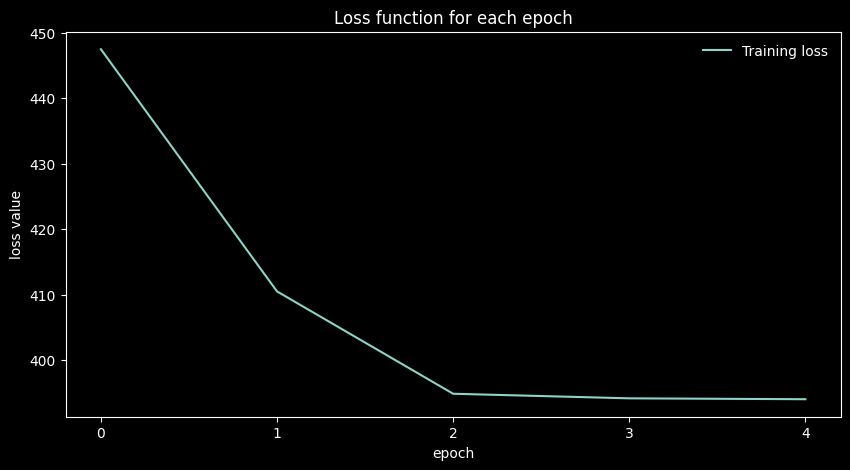

In [35]:
def plot_loss(loss):
  plt.figure(figsize=(10,5))
  plt.plot(loss, label="Training loss")
  plt.legend(frameon=False)
  plt.xticks([i for i in range(0, NUM_EPOCH)])
  plt.xlabel("epoch")
  plt.ylabel("loss value")
  plt.title("Loss function for each epoch")
  plt.show()

plot_loss(train_loss)

In [36]:
# test_loss = []
test_loss_ins = []

model.eval()
with torch.no_grad():
  test_epoch_loss = 0

# ▶ loader가 1 씩 들어가는 상황, 평균 낼 필요없이 모든 loss에 대해서 append 시키면 됨
for batch in test_loader:
  x, y = batch
  _, x_pred_test = model(x)
  loss_test = criterion(x_pred_test, x)
  test_loss_ins.append(loss_test.item()) # x개별마다의 loss를 하나씩 append 해줌 (이상탐지가 목적이기 때문에)

In [37]:
test_set = pd.concat([y_test.reset_index(drop=True),pd.DataFrame(test_loss_ins, columns=['mse'])], axis=1)
test_set

,HeartDiseaseorAttack,mse
0,0.0,3.795568
1,0.0,1.613488
2,0.0,3.426046
3,0.0,3.058814
4,0.0,2.240016
...,...,...
45952,1.0,4.255478
45953,0.0,4.623581
45954,0.0,2.150009
45955,0.0,2.022339


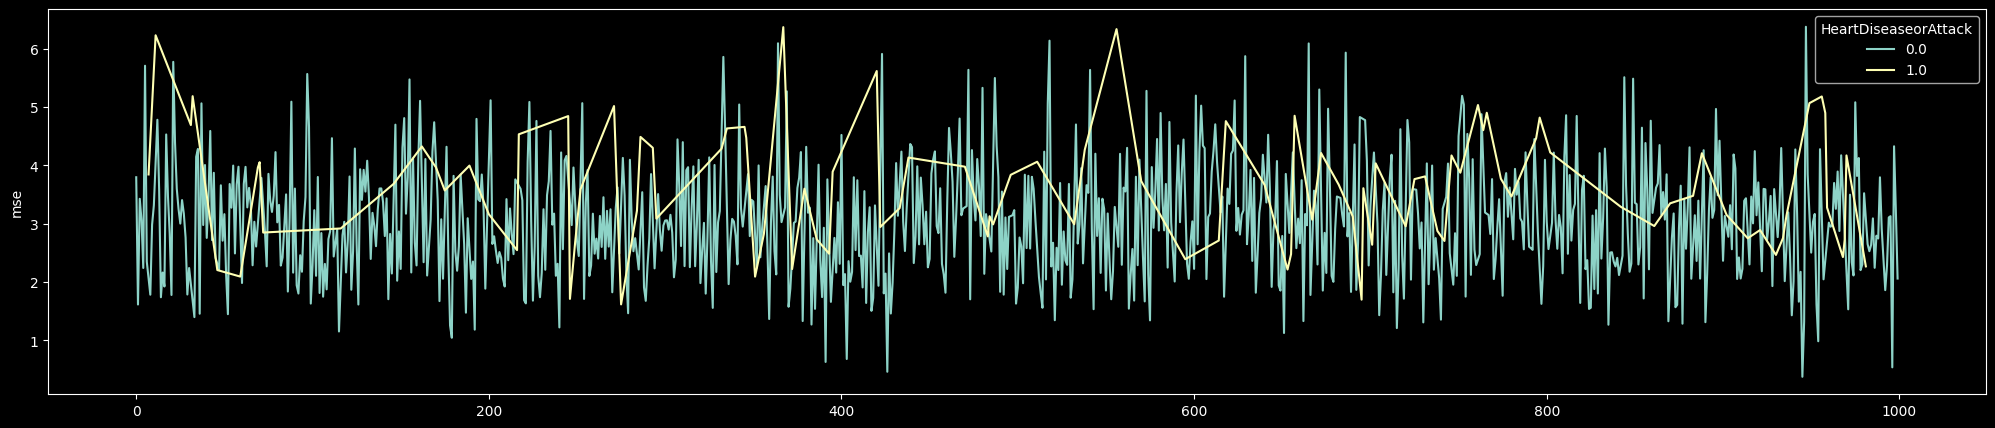

In [38]:
# ▶ train loss 출력
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

df_plot = test_set.iloc[0:1000,:]
fig = plt.figure(figsize=(25,5))
sns.lineplot(x=df_plot.index, y='mse', hue='HeartDiseaseorAttack', data=df_plot);

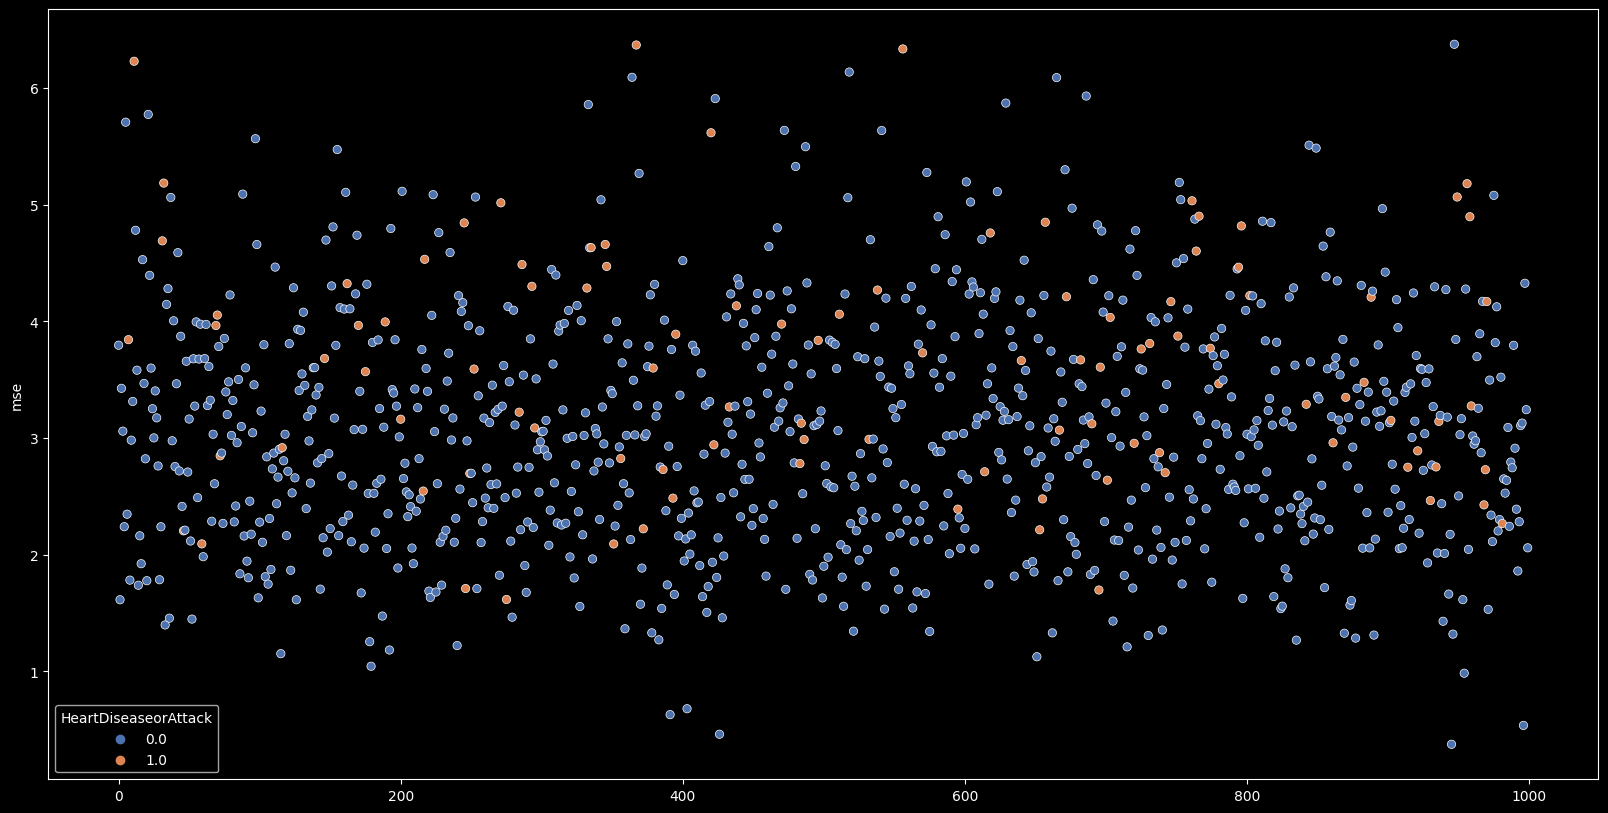

In [44]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(x=df_plot.index.astype(int), y=df_plot['mse'], hue=df_plot['HeartDiseaseorAttack'], palette="deep");

In [45]:
# ▶ 이상 data MSE
test_set[test_set['HeartDiseaseorAttack'] == 1.0]['mse'].mean()

3.7436661303393666

In [46]:
# ▶ 정상 data MSE
test_set[test_set['HeartDiseaseorAttack'] == 0.0]['mse'].mean()

3.080955901103962

In [47]:
# ▶ Threshold 설정 및 Binary Classification
test_set['abnormal'] = np.where(test_set['mse'] >3.7, 1, 0)
test_set.head()

,HeartDiseaseorAttack,mse,abnormal
0,0.0,3.795568,1
1,0.0,1.613488,0
2,0.0,3.426046,0
3,0.0,3.058814,0
4,0.0,2.240016,0


In [48]:
# ▶ 성능평가
from sklearn.metrics import classification_report
print(classification_report(test_set['HeartDiseaseorAttack'], test_set['abnormal']))

              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82     41214
         1.0       0.18      0.52      0.27      4743

    accuracy                           0.71     45957
   macro avg       0.56      0.63      0.55     45957
weighted avg       0.85      0.71      0.77     45957



In [49]:
# ▶ 이상진단
test_set['abnormal'].value_counts()

0    32684
1    13273
Name: abnormal, dtype: int64

In [50]:
# ▶ 실제값
test_set['HeartDiseaseorAttack'].value_counts()

0.0    41214
1.0     4743
Name: HeartDiseaseorAttack, dtype: int64